C:\Users\louis\AppData\Local\Temp\ipykernel_8184\962908655.py:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='missing_rate', data=region_df, palette='viridis')
C:\Users\louis\AppData\Local\Temp\ipykernel_8184\962908655.py:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region', y='problem_order_percentage', data=region_df, palette='magma')


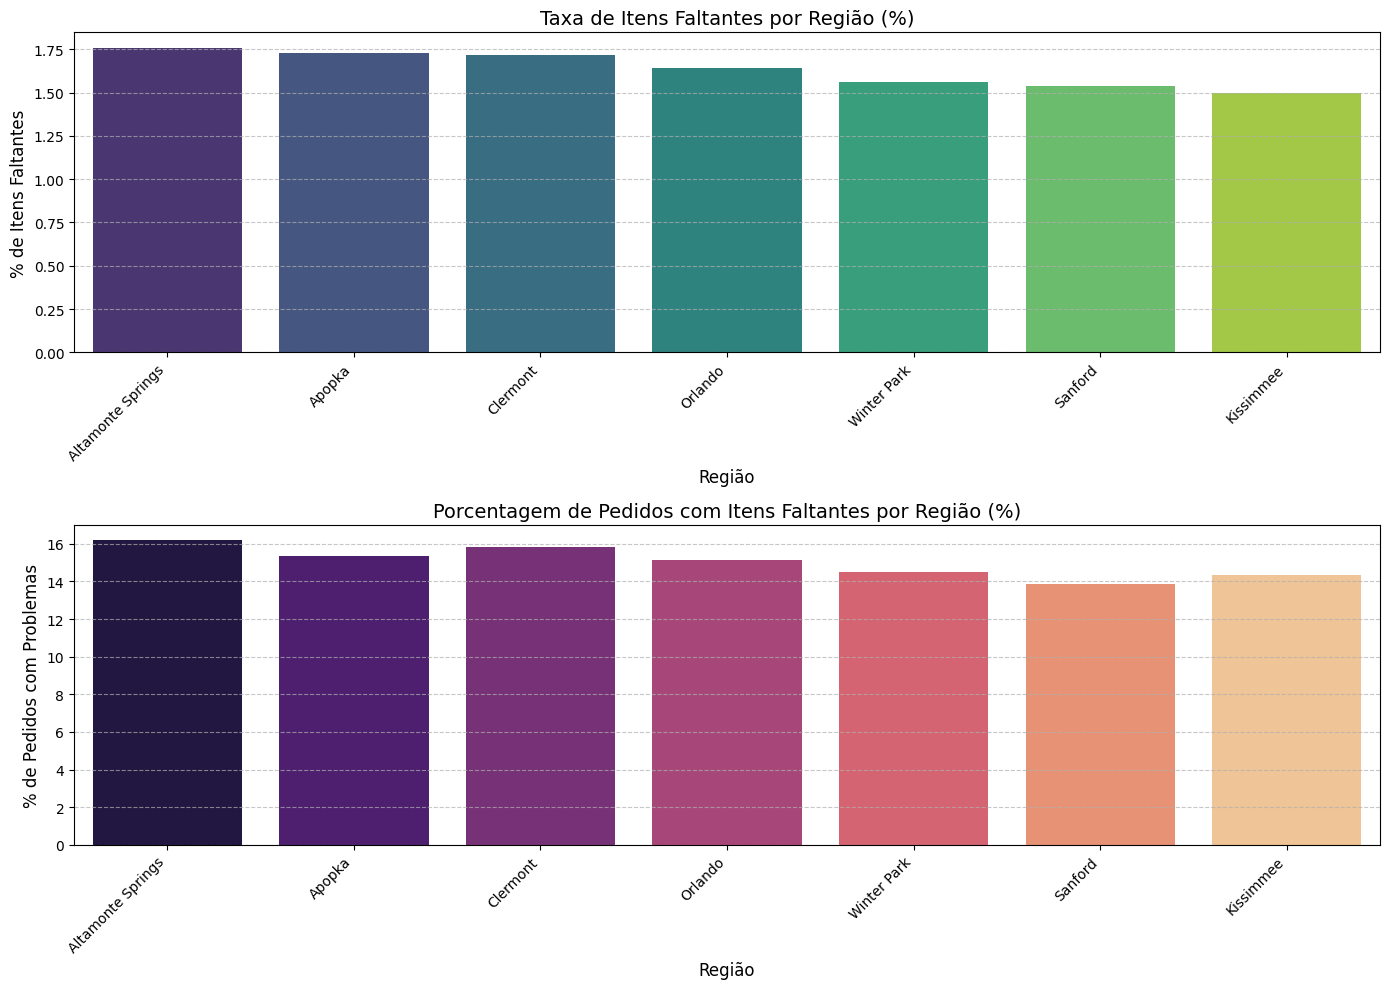

Estatísticas por Região:
           region  total_orders  total_missing_items  total_delivered_items  missing_rate  problem_order_percentage
Altamonte Springs          1426                  253                  14134          1.76                     16.20
           Apopka          1422                  249                  14153          1.73                     15.33
         Clermont          1384                  243                  13886          1.72                     15.82
          Orlando          1401                  233                  13986          1.64                     15.13
      Winter Park          1485                  235                  14790          1.56                     14.48
          Sanford          1461                  225                  14400          1.54                     13.89
        Kissimmee          1421                  219                  14345          1.50                     14.36


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import matplotlib.ticker as mtick

# Conectar ao banco de dados
conn = sqlite3.connect(r'C:\Users\louis\datatech\Database\walmart_fraudes.db')

# Análise por região
query_region = """
SELECT 
    region,
    COUNT(order_id) AS total_orders,
    SUM(items_missing) AS total_missing_items,
    SUM(items_delivered) AS total_delivered_items,
    ROUND(SUM(items_missing) * 100.0 / (SUM(items_delivered) + SUM(items_missing)), 2) AS missing_rate,
    ROUND(COUNT(CASE WHEN items_missing > 0 THEN 1 END) * 100.0 / COUNT(order_id), 2) AS problem_order_percentage
FROM 
    orders
GROUP BY 
    region
ORDER BY 
    missing_rate DESC
"""

region_df = pd.read_sql_query(query_region, conn)

# Configuração visual
plt.figure(figsize=(14, 10))

# Gráfico 1: Taxa de itens faltantes por região
plt.subplot(2, 1, 1)
sns.barplot(x='region', y='missing_rate', data=region_df, palette='viridis')
plt.title('Taxa de Itens Faltantes por Região (%)', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('% de Itens Faltantes', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Gráfico 2: Porcentagem de pedidos com problemas por região
plt.subplot(2, 1, 2)
sns.barplot(x='region', y='problem_order_percentage', data=region_df, palette='magma')
plt.title('Porcentagem de Pedidos com Itens Faltantes por Região (%)', fontsize=14)
plt.xlabel('Região', fontsize=12)
plt.ylabel('% de Pedidos com Problemas', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Tabela completa com estatísticas por região
print("Estatísticas por Região:")
print(region_df.to_string(index=False))